1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [47]:
# Load data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
import statsmodels.formula.api as sm
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [48]:
df = df.replace({'default':{'No':0, 'Yes':1}})
df = df.replace({'student':{'No':0, 'Yes':1}})
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

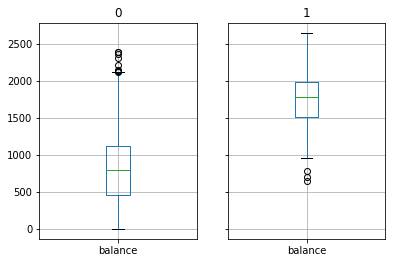

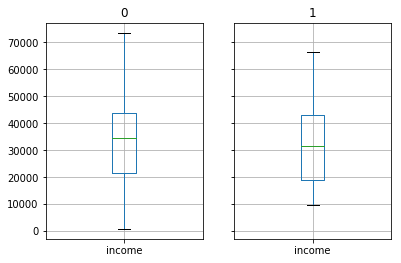

In [49]:
grouped = df.groupby('default')
grouped.boxplot(column='balance')
grouped.boxplot(column='income')


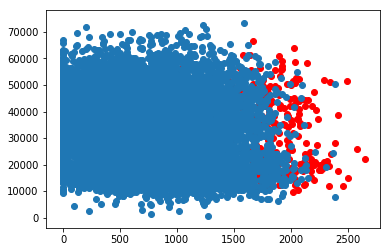

In [50]:
#Scatter plot
plt.figure()
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

X = df.drop(['default', 'student'],axis=1)
y = df['default']
# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

('C:', 10)
('Coefficient of each feature:', array([[  5.70909605e-03,   1.85252752e-05]]))
('Training accuracy:', 0.97399999999999998)
('Test accuracy:', 0.97333333333333338)

('C:', 1)
('Coefficient of each feature:', array([[  5.58368534e-03,   1.69157960e-05]]))
('Training accuracy:', 0.97385714285714287)
('Test accuracy:', 0.97333333333333338)

('C:', 0.1)
('Coefficient of each feature:', array([[  4.59415527e-03,   3.13381882e-06]]))
('Training accuracy:', 0.9721428571428572)
('Test accuracy:', 0.97266666666666668)

('C:', 0.001)
('Coefficient of each feature:', array([[ 0.00046916, -0.00012804]]))
('Training accuracy:', 0.9652857142857143)
('Test accuracy:', 0.96833333333333338)



Text(0,0.5,u'Income')

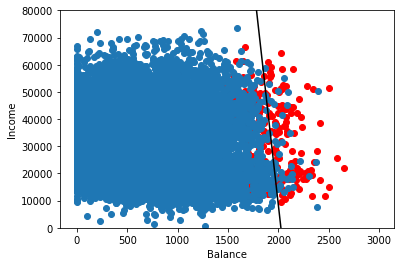

In [52]:
clf = LogisticRegression(penalty='l1', C=1)
clf.fit(X_train, y_train)

#Scatter plot
plt.figure()
plt.ylim(0,80000)
plt.scatter(df.loc[df['default'] == 1, 'balance'] , df.loc[df['default'] == 1, 'income'] , color='r')
plt.scatter(df.loc[df['default'] == 0, 'balance'] , df.loc[df['default'] == 0, 'income'])

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.xlabel('Balance')
plt.ylabel('Income')


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

   student      balance        income
1        0   729.526495  44361.625074
2        1   817.180407  12106.134700
3        0  1073.549164  31767.138947
4        0   529.250605  35704.493935
5        0   785.655883  38463.495879


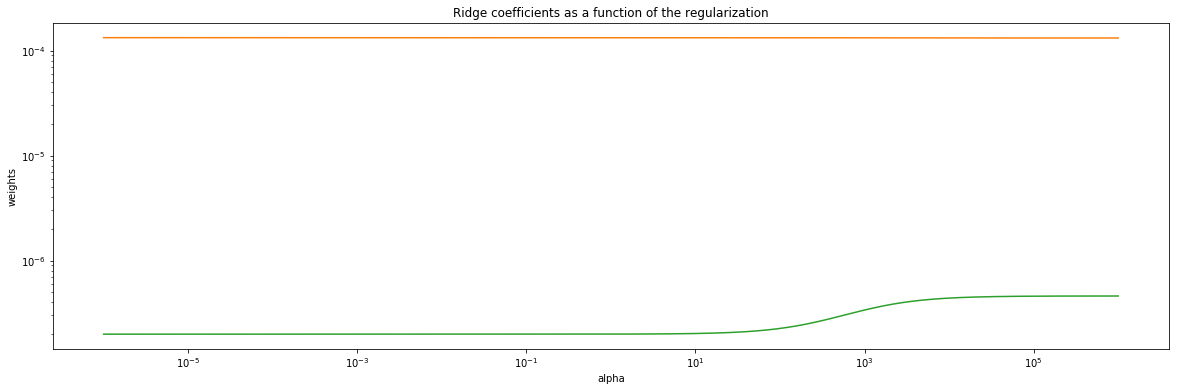

1e-06


In [71]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X = df.drop(['default'],axis=1)
y = df['default']

# Split the data into test and training sets, with 30% of samples being put into the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

n_alphas = 200
alphas = np.logspace(-50,0, n_alphas)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.loglog(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

test_errors=scores
alpha_optim=alphas[np.argmax(scores)]

alpha_best = alpha_optim
print(alpha_best)

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

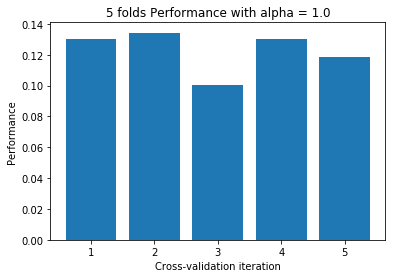

5 random folds provides similar performance as shown in the histogram below.


In [60]:
from sklearn.model_selection import cross_val_score

regr = Ridge(alpha=alpha_best)
cross_scores = cross_val_score(regr, X, y, cv=5)

plt.xlabel('Cross-validation iteration')
plt.ylabel('Performance')
plt.title('5 folds Performance with alpha = ' + str(alpha))
plt.bar(range(1,6),cross_scores)
plt.show()

print "5 random folds provides similar performance as shown in the histogram below."

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

8) Find the optimal decision tree depth and compute the AUC ROC. 